In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

In [18]:
t_data = pd.read_csv("/Users/anishreddy/Desktop/SampleNLP.csv")

In [19]:
t_data.shape
t_data.head()
t_data.columns
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patient_id             82 non-null     int64 
 1   appointment_reason     82 non-null     object
 2   clinical_observations  82 non-null     object
 3   doctor_advice_notes    82 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.7+ KB


In [20]:
t_data.fillna(0, inplace= True)
t_data.isnull().sum()

patient_id               0
appointment_reason       0
clinical_observations    0
doctor_advice_notes      0
dtype: int64

In [22]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer


stopwords = stopwords.words('english')
stemmer = SnowballStemmer("english")
tokenizer=RegexpTokenizer(r'\w+')
tags=r'@\w+'

In [23]:
def new_text(sentence, stem=False):
    sentence=[re.sub(tags,"",str(sentence))]
    text = []
    for word in sentence:
        if word not in stopwords:
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize("".join(text))

In [24]:
print(f"Original text: {t_data.appointment_reason[1:5]}")
print()
print(f"Preproccesed text : {new_text(t_data.appointment_reason[1:5])}")

Original text: 1    Ad Hoc Consult,Glucose monitoring, weight,weig...
2    Ad Hoc Consult,general questions, weight, diet...
3    Ad Hoc Consult,Blood Pressure check,BP, weight...
4    blood pressure check & weight,weight managemen...
Name: appointment_reason, dtype: object

Preproccesed text : ['1', 'ad', 'hoc', 'consult', 'glucose', 'monitoring', 'weight', 'weig', '2', 'ad', 'hoc', 'consult', 'general', 'questions', 'weight', 'diet', '3', 'ad', 'hoc', 'consult', 'blood', 'pressure', 'check', 'bp', 'weight', '4', 'blood', 'pressure', 'check', 'weight', 'weight', 'managemen', 'name', 'appointment_reason', 'dtype', 'object']


In [28]:
t_data.text=t_data.appointment_reason.map(new_text)

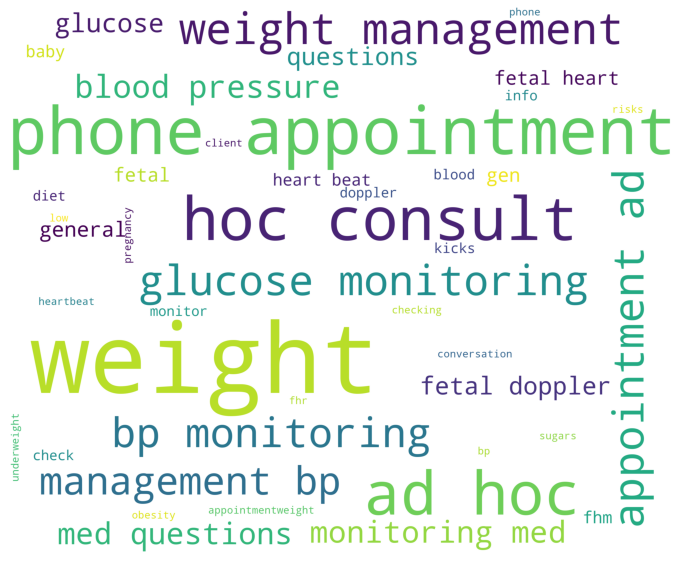

ad hoc consult ad hoc consult,glucose monitoring, weight,weight, blood sugars ad hoc consult,general questions, weight, diet,weight,weight management, bp monitoring, glucose ad hoc consult,blood pressure check,bp, weight,phone appointment,weight management, bp monitoring, med questions blood pressure check & weight,weight management, bp monitoring, glucose ad hoc consult,phone appointment,weight management, bp monitoring, med questions ad hoc consult,weight management, bp monitoring, glucose low weight,weight management,weight management, bp monitoring, med questions ad hoc consult,blood pressure and fetal monitoring,weight management, bp monitoring,weight management, bp monitoring, med questions ad hoc consult,phone appointment,weight, fetal doppler ad hoc consult,blood pressure,bp, weight,phone appointmentweight management, bp monitoring,weight management, bp monitoring, med questions,weight, bp ad hoc consult,checking on client general conversation,general questions about pregnancy 

In [29]:
from wordcloud import WordCloud,STOPWORDS
comment_words=''
stop_words = set(STOPWORDS)
for i in t_data.appointment_reason: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(comment_words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print(comment_words)

In [27]:
print(f"Original text: {t_data.doctor_advice_notes[1:5]}")
print()
print(f"Preproccesed text : {new_text(t_data.doctor_advice_notes[1:5])}")

Original text: 1    call me if any problems,Continue with same die...
2    Advised to continue fruit smoothies for consti...
3    Advised patient if flu-like symptoms, chills, ...
4    Continue doing what you're doing. Continue to ...
Name: doctor_advice_notes, dtype: object

Preproccesed text : ['1', 'call', 'me', 'if', 'any', 'problems', 'continue', 'with', 'same', 'die', '2', 'advised', 'to', 'continue', 'fruit', 'smoothies', 'for', 'consti', '3', 'advised', 'patient', 'if', 'flu', 'like', 'symptoms', 'chills', '4', 'continue', 'doing', 'what', 'you', 're', 'doing', 'continue', 'to', 'name', 'doctor_advice_notes', 'dtype', 'object']


In [30]:
t_data.text=t_data.doctor_advice_notes.map(new_text)

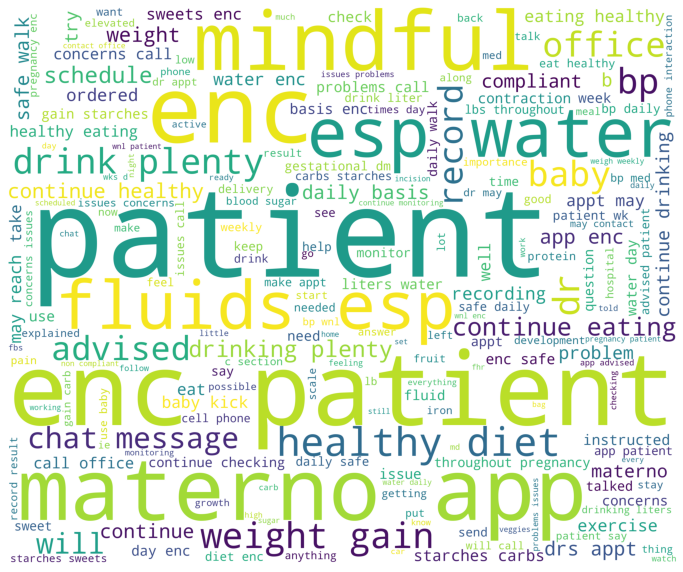

0 call me if any problems,continue with same diet, drinking fluids esp. water. stay safe. walk when she can safely. turn and reposition using pillows if back and leg pain persist. monitor contractions and baby kicks in materno app and record for dr to see. will try to expain again with interpreter to remind her to do the baby kicks and contractions when she feels them and record in app. patient basically doing well. have bag packed and sitting at door or in car for when she's ready to go to hospital. call dr or office when she feels contractions are strong or that it's happening.,on last visit i had suggested patient eat a light snack at night to try and prevent fbs from being too low and feeling dizzy and lightheaded when she wakes up. this has been helping patient. bs normal range in am and feeling better upon waking. try and maintain a healthy diet and drink ample fluids. weight has been basically staying the same.,told her to eat a light snack at bedtime, 1/2 sandwich, or a piece o

In [31]:
comment_words=''
stop_words = set(STOPWORDS)
for i in t_data.doctor_advice_notes: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(comment_words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print(comment_words)

Original text: 1    Client called on phone unable to connect was i...
2    Blood glucose 110. Patient without problems.,n...
3    no answer to app,No answer to app.,No answer t...
4    Ms Cordova was induced yesterday and delivered...
Name: clinical_observations, dtype: object

Preproccesed text : ['1', 'client', 'called', 'on', 'phone', 'unable', 'to', 'connect', 'was', 'i', '2', 'blood', 'glucose', '110', 'patient', 'without', 'problems', 'n', '3', 'no', 'answer', 'to', 'app', 'no', 'answer', 'to', 'app', 'no', 'answer', 't', '4', 'ms', 'cordova', 'was', 'induced', 'yesterday', 'and', 'delivered', 'name', 'clinical_observations', 'dtype', 'object']


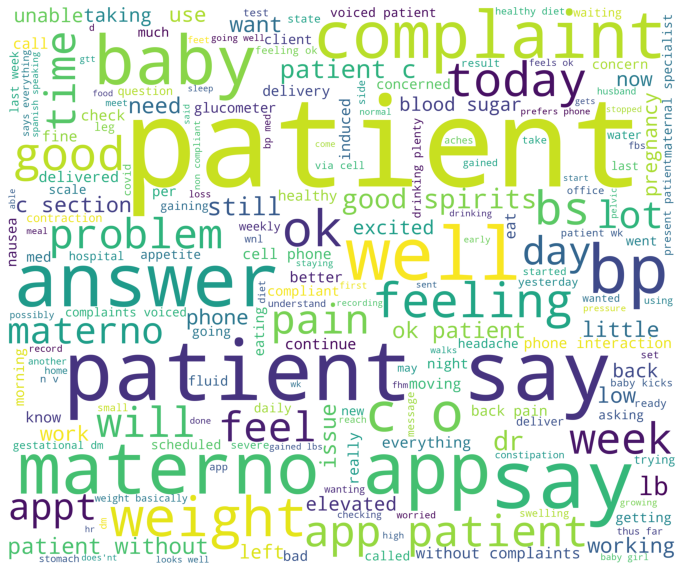

discharged. had healthy baby girl client called on phone unable to connect was in dentist office this am. weight this am 210.8. bs this am 76. legs and back pain at times. patient dod 4/29/2022. excited for delivery. may be induced earlier or ? c-section per patient. i'll check with dr or relate this question to dr. patient has loss 2 lbs but doing well with healthy eating per patient. drinking plenty fluids esp water and watching salt and spices in food.,patient doing well bs 68. no problems.,patient in hospital now to have her baby boy. she's excited and ready. excited for her first baby.,patient says her bs a little low in morning when she gets up. this am bs 65 and she felt lightheaded.,patient says trying to eat healthy. checking blood sugars and recording. blood sugar this am 88. eating light snack at night and has'nt been feeling lightheaded in the morning lately. blood glucose 110. patient without problems.,no answer will try to reschedule appt with her,patient c/o constipation

In [32]:
print(f"Original text: {t_data.clinical_observations[1:5]}")
print()
print(f"Preproccesed text : {new_text(t_data.clinical_observations[1:5])}")
t_data.text=t_data.clinical_observations.map(new_text)
comment_words=''
stop_words = set(STOPWORDS)
for i in t_data.clinical_observations: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(comment_words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
print(comment_words)